In [25]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import optimize
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Import your own code
from ExchangeEconomy import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#Question 1

model = ExchangeEconomyClass()

#Pareto optimal allocations, i.e. x1a and x2a, that leave both players as least as well off as they were when consuming their endowments
x1a_pareto_optimal, x2a_pareto_optimal= model.pareto_opt_allocations()

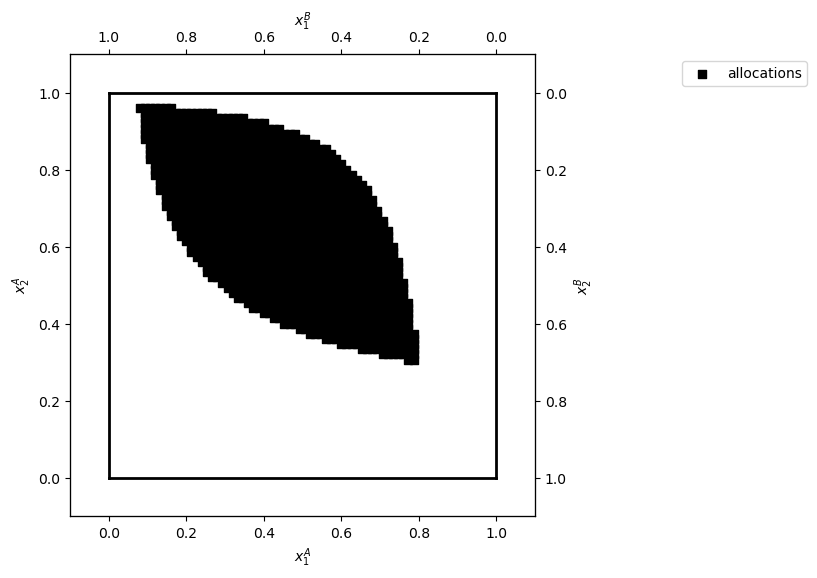

In [27]:
#plot the pareto optimal allocations
#plot the edgeworth box
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1a_pareto_optimal,x2a_pareto_optimal,marker='s',color='black',label='allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

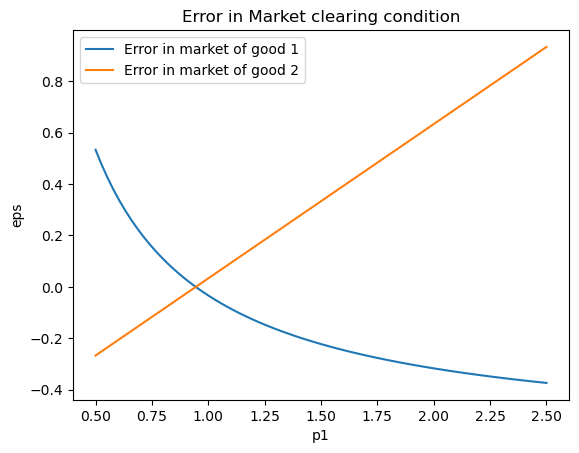

In [28]:
#Question 2

#2.a computation of errors in the market clearning condition 
eps1,eps2,p1= model.check_market_clearing()
 

#2.b plot these errors:
plt.plot(p1,eps1, label = "Error in market of good 1")
plt.plot(p1,eps2, label = "Error in market of good 2")
plt.xlabel('p1')
plt.ylabel('eps')
plt.title('Error in Market clearing condition')
plt.legend()
plt.show()

In [29]:
#Question 3

#3.a Computation of the market clearing price
p1_equilibrium,x1a_equilibrium,x2a_equilibrium,u_equilibrium= model.market_clearing_price()

#3.b Print this price.
print(f'The market clearing price is p1 = {p1_equilibrium}')

#3.c Print the market clearing allocation and the utility of the market clearing allocation.
print(f'The market clearing allocation is x1a = {x1a_equilibrium} and x2a = {x2a_equilibrium}')
print(f'The utility of the market clearing allocation is u = {u_equilibrium}')

The market clearing price is p1 = 0.9444444444444443
The market clearing allocation is x1a = 0.3725490196078432 and x2a = 0.7037037037037038
The utility of the market clearing allocation is u = 0.5692735854422963


The price that maximizes the utility of agent 1 is p1 = 1.8866666666666667
The maximal utility of agent A is u = 0.633615985237553
The allocation of agent A that maximizes their utility is x1a = 0.619316843345112 and x2a = 0.6408888888888888


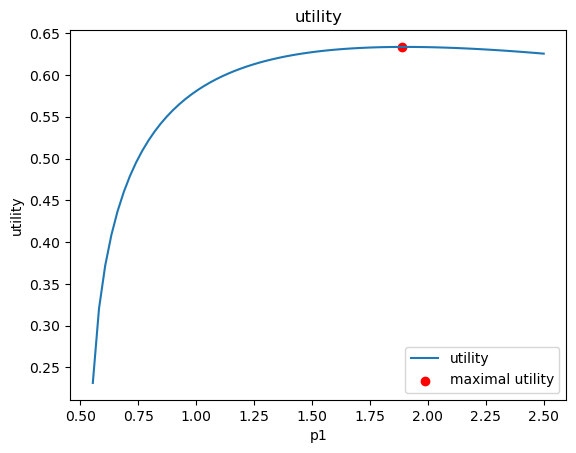

In [30]:
#Question 4.a

#Computation of the price that maximize the utility of agent A within the predefined subset of prices
p1_4a_optimal,p1_nonnegative,u,u_4a_optimal,x1a_4a_optimal,x2a_4a_optimal= model.max_utility_price_discrete()

#Print this price.
print(f'The price that maximizes the utility of agent 1 is p1 = {p1_4a_optimal}')
print(f'The maximal utility of agent A is u = {u_4a_optimal}')
print(f'The allocation of agent A that maximizes their utility is x1a = {x1a_4a_optimal} and x2a = {x2a_4a_optimal}')

#print the utility of agent A for the predefined subset of prices(only those such that demands are nonnegative)
plt.plot(p1_nonnegative,u, label = "utility")
plt.scatter(p1_4a_optimal,u_4a_optimal, label = "maximal utility", color = 'red')
plt.xlabel('p1')
plt.ylabel('utility')
plt.title('utility')
plt.legend()
plt.show()

In [31]:
#Question 4.b

#Computation of the price that maximizes the utility of agent A within positive prices
p1_4b_optimal,x1a_4b_optimal,x2a_4b_optimal,u_4b_optimal= model.max_utility_price_continuous()

#Print this price.
print(f'The price that maximize the utility of agent A is p1 = {p1_4b_optimal}')

#Print the allocation of agent A that maximizes the utility and the utility of agent A.
print(f'The allocation of agent 1 that maximizes the utility is x1a = {x1a_4b_optimal} and x2a = {x2a_4b_optimal}')
print(f'The maximal utility of agent 1 is u = {u_4b_optimal}')

The price that maximize the utility of agent A is p1 = 1.8993463310106764
The allocation of agent 1 that maximizes the utility is x1a = 0.6209681023514663 and x2a = 0.6400435779326216
The maximal utility of agent 1 is u = 0.6336208506936608


In [32]:
# Question 5.a

#Computation of the optimal allocations when A is the market maker and the choice set is restricted to C
x1a_5a_optimal,x2a_5a_optimal,u_5a_optimal= model.market_maker_A_restrictedtoC()

#Print these allocations and the utility of agent A.
print(f'The optimal allocation is: x1a = {x1a_5a_optimal} and x2a = {x2a_5a_optimal}')
print(f'The utility of agent A is u = {u_5a_optimal}')

The optimal allocation is: x1a = 0.56 and x2a = 0.8533333333333334
The utility of agent A is u = 0.7415523509091093


In [33]:
#Question 5.b

#Computation of the optimal allocations when A is the market maker and the choice set is such that B is at least as good as with the initial endowment and the allocations are within 0 and 1
x1a_5b_optimal,x2a_5b_optimal, u_5b_optimal= model.market_maker_A_unrestrictedtoC()

#Print these allocations and the utility of agent A.
print(f'The optimal allocation is: x1a = {x1a_5b_optimal} and x2a = {x2a_5b_optimal}')
print(f'The utility of agent 1 is u = {u_5b_optimal}')  

The optimal allocation is: x1a = 0.5757439196265602 and x2a = 0.8444386465096841
The utility of agent 1 is u = 0.7432276429058715


In [34]:
#Question 6.a

#Computation of the optimal allocations assuming that A’s and B’s consumption are chosen by a utilitarian social planner to maximize aggregate utility
x1a_social_optimum,x2a_social_optimum,u_social_a_optimal= model.social_planner_optimum()

#Print these allocations.
print(f'The optimal allocation is: x1a = {x1a_social_optimum} and x2a = {x2a_social_optimum}')
print(f'The social optimal utility of agent A is u = {u_social_a_optimal}')

The optimal allocation is: x1a = 0.3331630732785221 and x2a = 0.6665731473394745
The social optimal utility of agent A is u = 0.5289941013599152


In [35]:
#Question 6.b
#Price at 3a is a market clearing price. This price hasn't been computed through utility maximisation but imposing demand to be equal to supply. 
#Note that since Walras' law applies, it is enough to impose the equilibrium condition only for one good.
#In point 4a, the equilibrium price is computed by maximizing the utility of agent A.
#The resulting utility is higher with respect to the utility obtained in 3a. This is due to the fact that the price is chosen to maximize the utility of agent A. 
#In 3 both agents are simultaneously considered to find the equilibrium in both market of good 1 and market of good 2. This way agent A is assigned a small amount of good 1 -which is agent A least favourite- and a higher amount of good 2 -the most favourite. 
#On the other hand, in 4a agent A chooses only for themselves; thus, agent A chooses an higher quantity of good 2 than of good 1 but a higher quantity of good 1 compared to Point 3.
#Indeed, allocation 4a implies a higher price of good 1.
#In 4b, when prices are continuous and positive, the utility is slighlty higher than in 4a and higher than in 3. This is due to the fact that the price that maximizes agent A's utility can be chosen from a wider set of prices. Consequently, the price that maximises agent A's utility is higher. 
#In 5a, agent A is the market maker. Instead of choosing a price that maximises utility, they choose an allocation constrained within a set that not only considers A's preferences but also B's as it requires B's utility to be at least as good in the optimal allocation as it would be in their initial endowment.
#As a result, now A chooses a higher quantity of good 2 compared to Points 4a and 4b. Indeed, this time, they have utility of B's as a constraint. Resulting from this framework, A's utility is higher than at previous points. 
#Furthermore, utility in 5a is higher than in 5b. This is due to the contraints imposed in 5a which are wider than those in 5b. 
#However, the increment in utility is only marginal, as the two sets only differ for 5a imposes x1a and x2a to belong yo a discrete choice set (that defined in C), whereas 5b loosens the constraint allowing x1a and x2a to belong to the continuos set [0,1].
#Finally, in 6a, A is no longer the market maker and utility is maximised by a social planner who considers the social aggregate utility. Accordingly, utility of A is lower than in Previous points, as the social planner takes into account their utility together with that of B, maximizing them jointly. 
#In line with both agents' preferences, the optimal allocation chosen by the social planner consist in a higher quantity of good 2 than of good 1 for A.   


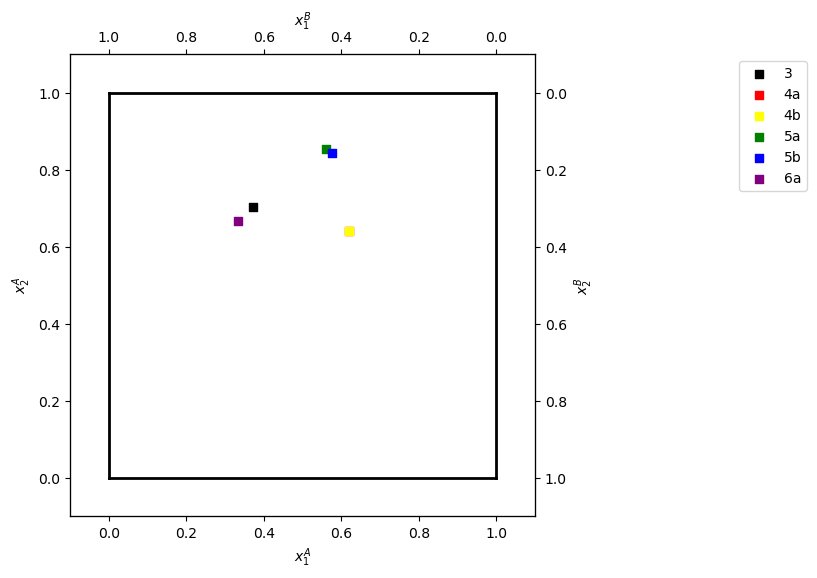

In [24]:
#plot the edgeworth box
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1a_equilibrium,x2a_equilibrium,marker='s',color='black',label='3')
ax_A.scatter(x1a_4a_optimal,x2a_4a_optimal,marker='s',color='red',label='4a')
ax_A.scatter(x1a_4b_optimal,x2a_4b_optimal,marker='s',color='yellow',label='4b')
ax_A.scatter(x1a_5a_optimal,x2a_5a_optimal,marker='s',color='green',label='5a')
ax_A.scatter(x1a_5b_optimal,x2a_5b_optimal,marker='s',color='blue',label='5b')
ax_A.scatter(x1a_social_optimum,x2a_social_optimum,marker='s',color='purple',label='6a')
# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

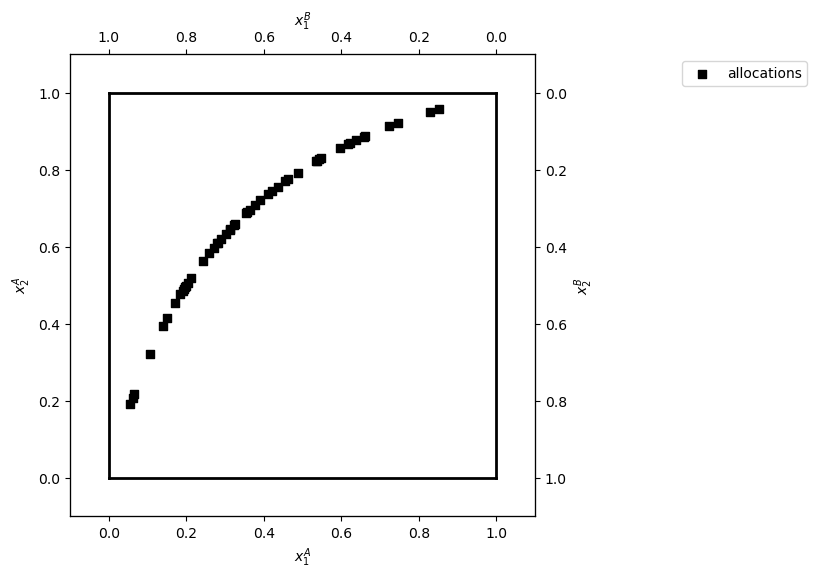

In [34]:
#Question 7 and 8: Edgeworth box
p1_edg,x1_edg,x2_edg = model.edgeworth_box()

#plot the edgeworth box
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1_edg,x2_edg,marker='s',color='black',label='allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));